In [1]:
import os
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2, SelectKBest
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math
from scipy.spatial import ConvexHull
import re
import enchant

In [2]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display
    
    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)
    
    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [3]:
# vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
vectorizer = TfidfVectorizer(stop_words='english', strip_accents='ascii')
ch2 = SelectKBest(chi2, k=1000)
# categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
#               'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
#               'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med',
#               'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
#               'talk.politics.misc', 'talk.religion.misc']
initial_categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball',
              'rec.sport.hockey', 'sci.electronics', 'soc.religion.christian', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']
comp_class = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
                   'comp.sys.mac.hardware', 'comp.windows.x', 'sci.electronics']
religion_class = ['alt.atheism', 'talk.religion.misc', 'soc.religion.christian']
sport_class = ['rec.sport.baseball', 'rec.sport.hockey']
auto_class = ['rec.autos', 'rec.motorcycles']
polit_class = ['talk.politics.mideast', 'talk.politics.misc']
target_classes_lbls = [religion_class, comp_class, sport_class, auto_class, polit_class]
eng_dict = enchant.Dict('en_US')

In [4]:
ng_train = fetch_20newsgroups(subset='train', categories=initial_categories,
                              remove=('headers', 'footers', 'quotes')
                             )
print ng_train.keys()

['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']


In [5]:
print ng_train['target_names']

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.electronics', 'soc.religion.christian', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
data_prep = []
for el in ng_train.data:
    filtered = re.findall(u'(?u)\\b\\w\\w+\\b', el)
    filtered = [filt for filt in filtered if eng_dict.check(filt)]
    el_prep = ' '.join(filtered)
    data_prep.append(el_prep)

In [7]:
# vectors_train = vectorizer.fit_transform(ng_train.data)
vectors_train = vectorizer.fit_transform(data_prep)
vectors_train

<8401x31912 sparse matrix of type '<type 'numpy.float64'>'
	with 446852 stored elements in Compressed Sparse Row format>

In [8]:
df = pd.DataFrame(data=vectors_train.copy().toarray())
df

,0,1,2,3,4,5,6,7,8,9,...,31902,31903,31904,31905,31906,31907,31908,31909,31910,31911
0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.106488,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
desc = df.describe(percentiles=[0.5, 0.8, 0.9, 0.95])
desc

,0,1,2,3,4,5,6,7,8,9,...,31902,31903,31904,31905,31906,31907,31908,31909,31910,31911
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,...,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,0.002076,0.002047,0.000047,0.000010,0.000020,0.000073,0.000040,0.000018,0.000002,0.000001,...,0.000064,0.000016,0.000007,0.000025,0.000044,0.000023,0.000086,0.000040,0.000029,0.000022
std,0.023361,0.020446,0.002377,0.000914,0.001829,0.004764,0.003659,0.001647,0.000135,0.000118,...,0.003546,0.001369,0.000614,0.002047,0.002823,0.001771,0.006870,0.002656,0.001470,0.001066
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.918386,0.739702,0.160668,0.083813,0.167667,0.333480,0.335334,0.150996,0.010349,0.010818,...,0.287299,0.125196,0.056284,0.186578,0.186578,0.159346,0.621927,0.208873,0.117195,0.068944


In [10]:
df.shape

(8401, 31912)

In [11]:
# data1 = df.copy()
# data1 = df
counter = 0
cols = []
for col_name in log_progress(desc.columns):
    if desc[col_name]['90%'] == 0.0:
#         data1.drop(col_name, axis=1, inplace=True)
        counter += 1
    else:
        cols.append(col_name)
print counter
print cols

31894
[10357, 10922, 10966, 14230, 17198, 17425, 17972, 18517, 20099, 20193, 21711, 25584, 28842, 28918, 29078, 30482, 31073, 31179]


In [12]:
data2 = df[cols]
data2

,10357,10922,10966,14230,17198,17425,17972,18517,20099,20193,21711,25584,28842,28918,29078,30482,31073,31179
0,0.049152,0.041581,0.117216,0.022279,0.095084,0.000000,0.056148,0.023730,0.000000,0.000000,0.196425,0.024413,0.000000,0.062641,0.086893,0.044750,0.048489,0.046136
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115432,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.061895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075080
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.189372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.214741,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.074985,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.090565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.183385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207953,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.077811,0.000000,0.030927,0.000000,0.000000,0.000000,0.029629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
data2.describe(percentiles=[0.5, 0.8, 0.9])

,10357,10922,10966,14230,17198,17425,17972,18517,20099,20193,21711,25584,28842,28918,29078,30482,31073,31179
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,0.007700,0.013034,0.013806,0.010303,0.014646,0.014854,0.014672,0.007335,0.008358,0.008536,0.011537,0.007542,0.011723,0.012162,0.009756,0.011155,0.007796,0.007839
std,0.030382,0.036909,0.034361,0.031659,0.036836,0.036550,0.034678,0.025419,0.031876,0.030576,0.034618,0.030229,0.039310,0.033824,0.029499,0.037138,0.027806,0.025685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,0.000000,0.000000,0.005925,0.000000,0.020020,0.013523,0.023630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,0.010163,0.052983,0.057637,0.043522,0.060147,0.061118,0.060025,0.023165,0.015136,0.023232,0.047897,0.016074,0.044034,0.051639,0.041868,0.042771,0.018157,0.029813
max,1.000000,0.405454,0.470774,0.492552,1.000000,0.434972,0.571752,0.347568,0.707107,0.506915,0.580653,1.000000,0.651070,0.436779,0.425437,1.000000,0.467385,0.347358


In [14]:
X_filt = data2.as_matrix()
X_filt.shape

(8401, 18)

In [15]:
X = X_filt.copy()
y = ng_train['target'].copy()
for i_el, el in enumerate(y):
    cat_name = ng_train['target_names'][el]
    for i_c, cl in enumerate(target_classes_lbls):
        if cat_name in cl:
            y[i_el] = i_c
            break
lbls = ['religion', 'computers', 'sport', 'auto-moto', 'politics']

In [16]:
agc = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(X, y)

In [17]:
error = np.mean(agc.labels_ != y)
print error

0.754910129746


---

In [18]:
pca_tr = PCA(2)

In [19]:
X_tr = pca_tr.fit_transform(X)

In [20]:
def get_dist(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

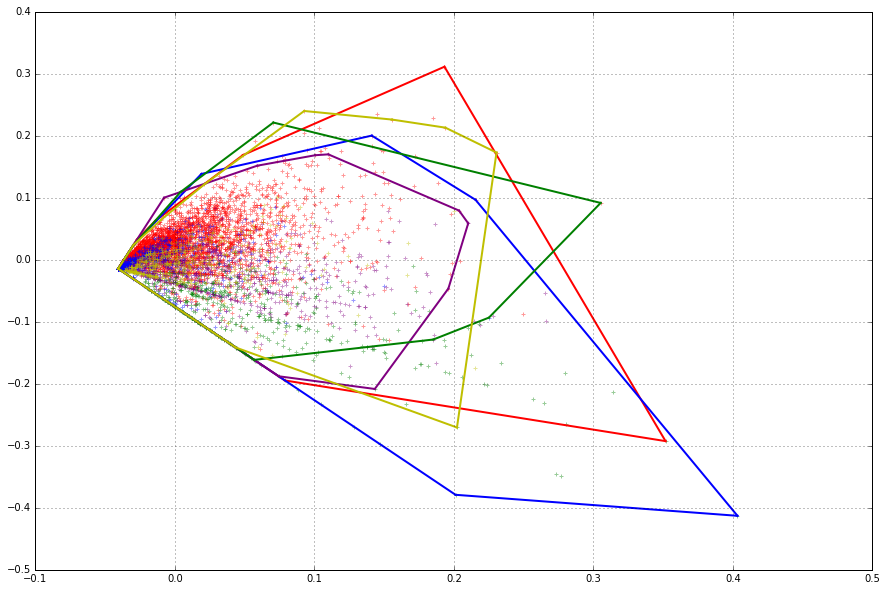

In [21]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

colors = ['r', 'b', 'purple', 'g', 'y']
for i in range(5):
    x_pred = X_tr[:, 0][agc.labels_ == i]
    y_pred = X_tr[:, 1][agc.labels_ == i]
    plt.scatter(x_pred, y_pred, c=colors[i], alpha=0.4, marker='+')
#     x_real = X_tr[:, 0][y == i]
#     y_real = X_tr[:, 1][y == i]
#     x_c = np.mean(x_real)
#     y_c = np.mean(y_real)
#     r = 0
#     for tmp_x, tmp_y in X_tr:
#         tmp_r = get_dist(tmp_x, tmp_y, x_c, y_c)
#         if tmp_r > r:
#             r = tmp_r
#     print r
#     c = plt.Circle((x_c, y_c), r, color=colors[i], fill=False)
#     ax.add_patch(c)
    xy = X_tr[y == i]
    hull = ConvexHull(xy)
    for simplex in hull.simplices:
        plt.plot(xy[simplex, 0], xy[simplex, 1], colors[i], linewidth=2.0)

plt.grid(True)